In [1]:
! pip install geopandas
! pip install pandas


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 KB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 7.2 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable


In [21]:
import geopandas as gpd
import pandas as pd

In [20]:
!pip install py7zr geopandas openpyxl tqdm s3fs
!pip install PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/inseefrlab/cartiflette to /tmp/pip-req-build-2hp34_b7
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-2hp34_b7
  Resolved https://github.com/inseefrlab/cartiflette to commit 2e38b5f829df6a6fa1578268112ff88853c9a4bf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
^C
ERROR: Operation cancelled by user


In [28]:
velib_data = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
stations = gpd.read_file(velib_data)
stations.head(6)


Skipping field coordonnees_geo: unsupported OGR type: 3


,capacity,name,stationcode,geometry
0,30,Gustave Eiffel - Parc des Impressionnistes,21114,POINT (2.29469 48.90391)
1,33,Bachaumont - Montmartre,2101,POINT (2.34498 48.86617)
2,60,Auguste Blanqui - Glacière,13515,POINT (2.34382 48.83115)
3,48,Metz - Faubourg Saint-Denis,10004,POINT (2.35352 48.87089)
4,42,Raffet - Montmorency,16115,POINT (2.26293 48.85259)
5,36,Amaury Duval - Gabriel Péri,21219,POINT (2.32384 48.81719)


In [29]:
#selection des stations à plus de 10 place
stations_10 = stations.sort_values(by="capacity",ascending=False).head()
display(stations_10)
#Ou
stations_10=stations.loc[stations['capacity']>10,"name"]
display(stations_10)


,capacity,name,stationcode,geometry
207,76,Assemblée Nationale,7009,POINT (2.32012 48.86141)
734,74,Emeriau - Beaugrenelle,15030,POINT (2.28431 48.84791)
1106,71,Grenelle - Dr Finlay,15028,POINT (2.29195 48.85132)
663,69,Censier - Santeuil,5034,POINT (2.35375 48.84066)
1319,68,Fabre d'Eglantine - Place de la Nation,12157,POINT (2.39562 48.84711)


0       Gustave Eiffel - Parc des Impressionnistes
1                          Bachaumont - Montmartre
2                       Auguste Blanqui - Glacière
3                      Metz - Faubourg Saint-Denis
4                             Raffet - Montmorency
                           ...                    
1479            Champs de Manoeuvre - Cartoucherie
1480                     Division Leclerc - Kléber
1481                        Bobillot - Paulin Mery
1482                               Créteil Village
1484      Aristide Briand - Place de la Résistance
Name: name, Length: 1460, dtype: object

In [30]:
#On veut que celle dans la petite couronne à savoir 75, 92, 93, 94
from cartiflette import carti_download

idf = carti_download(
    values=["11"],
    crs=4326,
    borders="COMMUNE",
    vectorfile_format="geojson",
    filter_by="REGION",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)
display(idf.head())
idf_pc=idf.loc[idf["INSEE_DEP"].isin(["75","92","93","94"])] 


,INSEE_DEP,INSEE_REG,ID,NOM,INSEE_COM,STATUT,POPULATION,AREA,ARR,CV,...,AAV2020,TAAV2017,TDAAV2017,CATEAAV2020,BV2012,LIBELLE_DEPARTEMENT,LIBELLE_REGION,PAYS,SOURCE,geometry
0,77,11,COMMUNE_0000000009736496,Coutevroult,77141,Commune simple,1167,metropole,771,7721,...,001,5,50,20,77171,Seine-et-Marne,Île-de-France,France,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((2.83569 48.86094, 2.83831 48.86115, ..."
1,77,11,COMMUNE_0000000009736492,Bailly-Romainvilliers,77018,Commune simple,7416,metropole,775,7721,...,001,5,50,12,77449,Seine-et-Marne,Île-de-France,France,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((2.80322 48.82926, 2.8056 48.82977, 2..."
2,77,11,COMMUNE_0000002200276623,Beautheil-Saints,77433,Commune simple,1992,metropole,771,7705,...,001,5,50,20,77131,Seine-et-Marne,Île-de-France,France,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((3.10784 48.73297, 3.10808 48.73686, ..."
3,77,11,COMMUNE_0000000009738798,Maison-Rouge,77272,Commune simple,862,metropole,773,7718,...,001,5,50,20,77327,Seine-et-Marne,Île-de-France,France,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((3.13828 48.53821, 3.14166 48.5374, 3..."
4,77,11,COMMUNE_0000000009738351,Mormant,77317,Commune simple,5014,metropole,773,7714,...,001,5,50,20,77317,Seine-et-Marne,Île-de-France,France,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((2.90989 48.58302, 2.9098 48.58458, 2..."


Text(0.5, 1.0, 'Petite couronne')

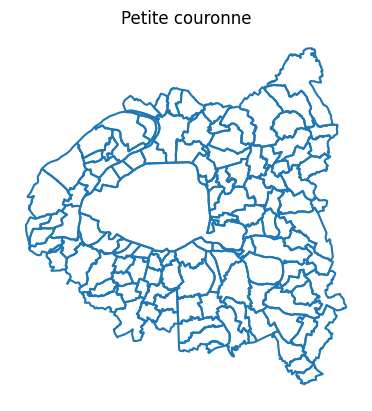

In [31]:
ax=idf_pc.boundary.plot() #cartiflette nous permet de representer grace au forntiere)
ax.set_axis_off()
ax.set_title("Petite couronne")
test



In [2]:
stations_10.to_crs(epsg=2154,inplace=True)
idf_pc.to_crs(epseg=2154,inplace=True)
stations_10.plot()





NameError: name 'stations_10' is not defined